<a href="https://colab.research.google.com/github/CNielsen94/Exercises_AAUBSDS/blob/main/New_York_City_Taxi_Trip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installs

In [1]:
!pip install polars
!pip install pyarrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 81.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Imports
import polars as pl
import urllib.request
import os

# Download the dataset

In [3]:
#Read the dataset
filename = "yellow_tripdata_2023-01.parquet"
df = pl.read_parquet(filename)

In [4]:
df.head()

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
i64,datetime[ns],datetime[ns],f64,f64,f64,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,"""N""",161,141,2,9.3,1.0,0.5,0.0,0.0,1.0,14.3,2.5,0.0
2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.1,1.0,"""N""",43,237,1,7.9,1.0,0.5,4.0,0.0,1.0,16.9,2.5,0.0
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,"""N""",48,238,1,14.9,1.0,0.5,15.0,0.0,1.0,34.9,2.5,0.0
1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.9,1.0,"""N""",138,7,1,12.1,7.25,0.5,0.0,0.0,1.0,20.85,0.0,1.25
2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,"""N""",107,79,1,11.4,1.0,0.5,3.28,0.0,1.0,19.68,2.5,0.0


# Basic EDA

In [5]:
print(df.shape)
print(df.dtypes)
print(df.null_count())

(3066766, 19)
[Int64, Datetime(time_unit='ns', time_zone=None), Datetime(time_unit='ns', time_zone=None), Float64, Float64, Float64, Utf8, Int64, Int64, Int64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64]
shape: (1, 19)
┌──────────┬────────────┬────────────┬────────────┬───┬────────────┬────────────┬────────────┬───────────┐
│ VendorID ┆ tpep_picku ┆ tpep_dropo ┆ passenger_ ┆ … ┆ improvemen ┆ total_amou ┆ congestion ┆ airport_f │
│ ---      ┆ p_datetime ┆ ff_datetim ┆ count      ┆   ┆ t_surcharg ┆ nt         ┆ _surcharge ┆ ee        │
│ u32      ┆ ---        ┆ e          ┆ ---        ┆   ┆ e          ┆ ---        ┆ ---        ┆ ---       │
│          ┆ u32        ┆ ---        ┆ u32        ┆   ┆ ---        ┆ u32        ┆ u32        ┆ u32       │
│          ┆            ┆ u32        ┆            ┆   ┆ u32        ┆            ┆            ┆           │
╞══════════╪════════════╪════════════╪════════════╪═══╪════════════╪════════════╪════════════╪════════

In [6]:
# Remove rows with missing values
df = df.drop_nulls()
print(df.null_count())

shape: (1, 19)
┌──────────┬────────────┬────────────┬────────────┬───┬────────────┬────────────┬────────────┬───────────┐
│ VendorID ┆ tpep_picku ┆ tpep_dropo ┆ passenger_ ┆ … ┆ improvemen ┆ total_amou ┆ congestion ┆ airport_f │
│ ---      ┆ p_datetime ┆ ff_datetim ┆ count      ┆   ┆ t_surcharg ┆ nt         ┆ _surcharge ┆ ee        │
│ u32      ┆ ---        ┆ e          ┆ ---        ┆   ┆ e          ┆ ---        ┆ ---        ┆ ---       │
│          ┆ u32        ┆ ---        ┆ u32        ┆   ┆ ---        ┆ u32        ┆ u32        ┆ u32       │
│          ┆            ┆ u32        ┆            ┆   ┆ u32        ┆            ┆            ┆           │
╞══════════╪════════════╪════════════╪════════════╪═══╪════════════╪════════════╪════════════╪═══════════╡
│ 0        ┆ 0          ┆ 0          ┆ 0          ┆ … ┆ 0          ┆ 0          ┆ 0          ┆ 0         │
└──────────┴────────────┴────────────┴────────────┴───┴────────────┴────────────┴────────────┴───────────┘


In [7]:
# Filter trips with a fare amount of at least $10 and a trip distance of at least 1 mile
df_filtered = df.filter((df["fare_amount"] >= 10) & (df["trip_distance"] >= 1))
df_filtered 

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
i64,datetime[ns],datetime[ns],f64,f64,f64,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,"""N""",48,238,1,14.9,1.0,0.5,15.0,0.0,1.0,34.9,2.5,0.0
1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.9,1.0,"""N""",138,7,1,12.1,7.25,0.5,0.0,0.0,1.0,20.85,0.0,1.25
2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,"""N""",107,79,1,11.4,1.0,0.5,3.28,0.0,1.0,19.68,2.5,0.0
2,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,1.0,"""N""",161,137,1,12.8,1.0,0.5,10.0,0.0,1.0,27.8,2.5,0.0
2,2023-01-01 00:09:22,2023-01-01 00:19:49,1.0,1.66,1.0,"""N""",239,143,1,12.1,1.0,0.5,3.42,0.0,1.0,20.52,2.5,0.0
2,2023-01-01 00:27:12,2023-01-01 00:49:56,1.0,11.7,1.0,"""N""",142,200,1,45.7,1.0,0.5,10.74,3.0,1.0,64.44,2.5,0.0
2,2023-01-01 00:21:44,2023-01-01 00:36:40,1.0,2.95,1.0,"""N""",164,236,1,17.7,1.0,0.5,5.68,0.0,1.0,28.38,2.5,0.0
2,2023-01-01 00:39:42,2023-01-01 00:50:36,1.0,3.01,1.0,"""N""",141,107,2,14.9,1.0,0.5,0.0,0.0,1.0,19.9,2.5,0.0
2,2023-01-01 00:53:01,2023-01-01 01:01:45,1.0,1.8,1.0,"""N""",234,68,1,11.4,1.0,0.5,3.28,0.0,1.0,19.68,2.5,0.0


In [8]:
# Calculate the average fare amount per passenger count
avg_fare_per_passenger = df.select([
    pl.col("passenger_count"),
    pl.col("fare_amount")
]).groupby("passenger_count").agg([
    pl.col("fare_amount").mean().alias("average_fare_amount")
]).sort("passenger_count")

print(avg_fare_per_passenger)

shape: (10, 2)
┌─────────────────┬─────────────────────┐
│ passenger_count ┆ average_fare_amount │
│ ---             ┆ ---                 │
│ f64             ┆ f64                 │
╞═════════════════╪═════════════════════╡
│ 0.0             ┆ 16.258301           │
│ 1.0             ┆ 17.864871           │
│ 2.0             ┆ 20.18778            │
│ 3.0             ┆ 19.665432           │
│ …               ┆ …                   │
│ 6.0             ┆ 18.010731           │
│ 7.0             ┆ 68.166667           │
│ 8.0             ┆ 82.113077           │
│ 9.0             ┆ 90.0                │
└─────────────────┴─────────────────────┘


In [9]:
# Calculate the total fare amount per pickup hour of the day

import pandas as pd

# Calculate the total fare amount per pickup hour of the day
pickup_datetime_series = df["tpep_pickup_datetime"].to_pandas()
pickup_hour_series = pickup_datetime_series.dt.hour
pickup_hour_pl = pl.Series("pickup_hour", pickup_hour_series)

df = df.with_columns([pickup_hour_pl])

total_fare_per_hour = df.select([
    pl.col("pickup_hour"),
    pl.col("fare_amount")
]).groupby("pickup_hour").agg([
    pl.col("fare_amount").sum().alias("total_fare_amount")
]).sort("pickup_hour")

print(total_fare_per_hour)

shape: (24, 2)
┌─────────────┬───────────────────┐
│ pickup_hour ┆ total_fare_amount │
│ ---         ┆ ---               │
│ i64         ┆ f64               │
╞═════════════╪═══════════════════╡
│ 0           ┆ 1.6107e6          │
│ 1           ┆ 1.0144e6          │
│ 2           ┆ 666240.25         │
│ 3           ┆ 458632.02         │
│ …           ┆ …                 │
│ 20          ┆ 2.8967e6          │
│ 21          ┆ 2.8905e6          │
│ 22          ┆ 2.7629e6          │
│ 23          ┆ 2.2754e6          │
└─────────────┴───────────────────┘


In [10]:
import pandas as pd

# Calculate the total fare amount per pickup hour of the day
pickup_datetime_series = df["tpep_pickup_datetime"].to_pandas()
pickup_hour_series = pickup_datetime_series.dt.hour
pickup_hour_pl = pl.Series("pickup_hour", pickup_hour_series)

df = df.with_columns([pickup_hour_pl])

total_fare_per_hour = df.select([
    pl.col("pickup_hour"),
    pl.col("fare_amount")
]).groupby("pickup_hour").agg([
    pl.col("fare_amount").sum().alias("total_fare_amount")
]).sort("pickup_hour")

# Format the total_fare_amount column to display numbers without scientific notation
total_fare_per_hour = total_fare_per_hour.with_column(
    total_fare_per_hour["total_fare_amount"].apply(
        lambda x: '{:,.2f}'.format(x), return_dtype=pl.Object
    ).alias("total_fare_amount_formatted")
)

print(total_fare_per_hour)

shape: (24, 3)
┌─────────────┬───────────────────┬─────────────────────────────┐
│ pickup_hour ┆ total_fare_amount ┆ total_fare_amount_formatted │
│ ---         ┆ ---               ┆ ---                         │
│ i64         ┆ f64               ┆ object                      │
╞═════════════╪═══════════════════╪═════════════════════════════╡
│ 0           ┆ 1.6107e6          ┆ 1,610,664.45                │
│ 1           ┆ 1.0144e6          ┆ 1,014,410.16                │
│ 2           ┆ 666240.25         ┆ 666,240.25                  │
│ 3           ┆ 458632.02         ┆ 458,632.02                  │
│ …           ┆ …                 ┆ …                           │
│ 20          ┆ 2.8967e6          ┆ 2,896,749.60                │
│ 21          ┆ 2.8905e6          ┆ 2,890,479.12                │
│ 22          ┆ 2.7629e6          ┆ 2,762,865.57                │
│ 23          ┆ 2.2754e6          ┆ 2,275,383.75                │
└─────────────┴───────────────────┴──────────────────────────

<ipython-input-10-f53269783dab>:18: DeprecationWarning: `DataFrame.with_column` has been renamed; this redirect is temporary, please use `.with_columns` instead
  total_fare_per_hour = total_fare_per_hour.with_column(


In [11]:
# Compute the mean trip distance, fare amount, and passenger count
mean_trip_distance = df_filtered["trip_distance"].mean()
mean_fare_amount = df_filtered["fare_amount"].mean()
mean_passenger_count = df_filtered["passenger_count"].mean()

print(f"Mean trip distance: {mean_trip_distance}")
print(f"Mean fare amount: {mean_fare_amount}")
print(f"Mean passenger count: {mean_passenger_count}")

Mean trip distance: 4.679980187293675
Mean fare amount: 23.587006371928176
Mean passenger count: 1.3739224988028462


In [12]:
# Compute the median trip distance and fare amount
median_trip_distance = df_filtered["trip_distance"].median()
median_fare_amount = df_filtered["fare_amount"].median()
print(f"Median trip distance: {median_trip_distance}")
print(f"Median fare amount: {median_fare_amount}")

Median trip distance: 2.57
Median fare amount: 16.3


# Visualize the data

In [13]:
import matplotlib.pyplot as plt

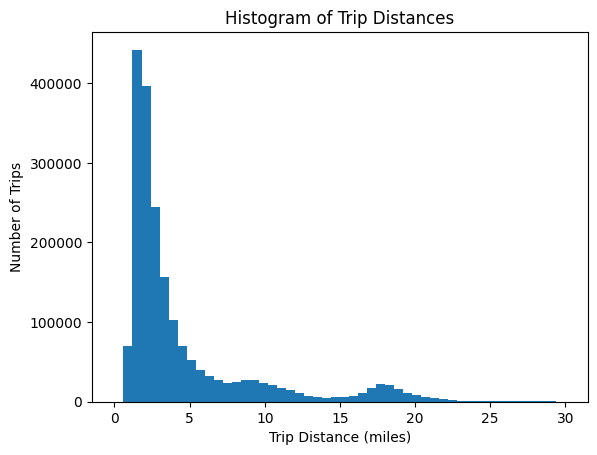

In [14]:
# Create a histogram of trip distances
plt.hist(df_filtered["trip_distance"].to_numpy(), bins=50, range=(0, 30))
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Number of Trips")
plt.title("Histogram of Trip Distances")
plt.show()

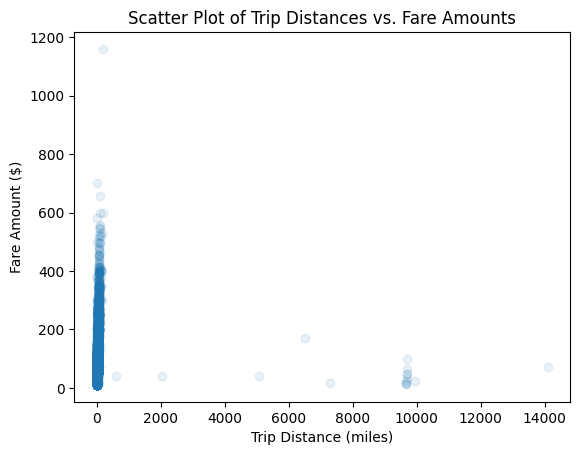

In [15]:
# Create a scatter plot of trip distances vs. fare amounts
plt.scatter(df_filtered["trip_distance"].to_numpy(), df_filtered["fare_amount"].to_numpy(), alpha=0.1)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Scatter Plot of Trip Distances vs. Fare Amounts")
plt.show()

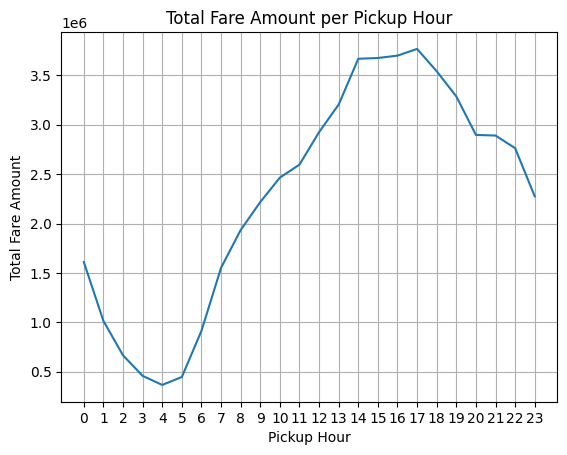

In [16]:
# Visualize the total fare amount per pickup hour of the day
x = total_fare_per_hour["pickup_hour"].to_numpy()
y = total_fare_per_hour["total_fare_amount"].to_numpy()

plt.plot(x, y)
plt.xlabel("Pickup Hour")
plt.ylabel("Total Fare Amount")
plt.title("Total Fare Amount per Pickup Hour")
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

# Taxi Zone Lookup Table Dataset

In [44]:
#Read the dataset
filename2 = "https://raw.githubusercontent.com/CNielsen94/Exercises_AAUBSDS/main/MLOps_assignments/Assignment_two/taxi%2B_zone_lookup.csv"
taxi_zone_df = pl.read_csv(filename2)

In [45]:
taxi_zone_df.head()

LocationID,Borough,Zone,service_zone
i64,str,str,str
1,"""EWR""","""Newark Airport…","""EWR"""
2,"""Queens""","""Jamaica Bay""","""Boro Zone"""
3,"""Bronx""","""Allerton/Pelha…","""Boro Zone"""
4,"""Manhattan""","""Alphabet City""","""Yellow Zone"""
5,"""Staten Island""","""Arden Heights""","""Boro Zone"""


In [19]:
print(taxi_zone_df.schema)

{'LocationID': Int64, 'Borough': Utf8, 'Zone': Utf8, 'service_zone': Utf8}


# Merge the datasets

In [20]:
# Step 0: Rename columns in taxi_zone_df to avoid duplicates during join
taxi_zone_df = taxi_zone_df.with_columns([
    pl.col("LocationID").alias("LocationID_pickup"),
    pl.col("Borough").alias("Borough_pickup"),
    pl.col("Zone").alias("Zone_pickup"),
    pl.col("service_zone").alias("service_zone_pickup"),
])

# Step 1: Join the main dataset with the Taxi Zone Lookup Table on PULocationID and LocationID_pickup
df = df.join(
    taxi_zone_df,
    left_on="PULocationID",
    right_on="LocationID_pickup",
    how="left"
)

# Step 2: Rename columns in taxi_zone_df again for the dropoff join
taxi_zone_df = taxi_zone_df.with_columns([
    pl.col("LocationID_pickup").alias("LocationID_dropoff"),
    pl.col("Borough_pickup").alias("Borough_dropoff"),
    pl.col("Zone_pickup").alias("Zone_dropoff"),
    pl.col("service_zone_pickup").alias("service_zone_dropoff"),
])

# Step 3: Join the updated main dataset with the Taxi Zone Lookup Table on DOLocationID and LocationID_dropoff
df = df.join(
    taxi_zone_df,
    left_on="DOLocationID",
    right_on="LocationID_dropoff",
    how="left"
)

# Heatmaps

In [22]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.1 MB/s eta 0:00:00


In [32]:
# Aggregate the number of pickups per borough
pickup_counts = df.groupby("Borough_pickup").agg(
    [
        pl.count("Borough_pickup").alias("num_pickups")
    ]
)

# Aggregate the number of drop-offs per borough
dropoff_counts = df.groupby("Borough_dropoff").agg(
    [
        pl.count("Borough_dropoff").alias("num_dropoffs")
    ]
)

# Join pickup_counts and dropoff_counts DataFrames
borough_counts = pickup_counts.join(
    dropoff_counts,
    left_on="Borough_pickup",
    right_on="Borough_dropoff"
)

In [46]:
import geopandas as gpd

# Load the NYC Borough boundaries GeoJSON file
nyc_boroughs = gpd.read_file("https://raw.githubusercontent.com/CNielsen94/Exercises_AAUBSDS/main/MLOps_assignments/Assignment_two/Borough%20Boundaries.geojson")

# Merge the GeoDataFrame with the aggregated data
nyc_boroughs = nyc_boroughs.merge(
    borough_counts.to_pandas(),
    left_on="boro_name",
    right_on="Borough_pickup"
)

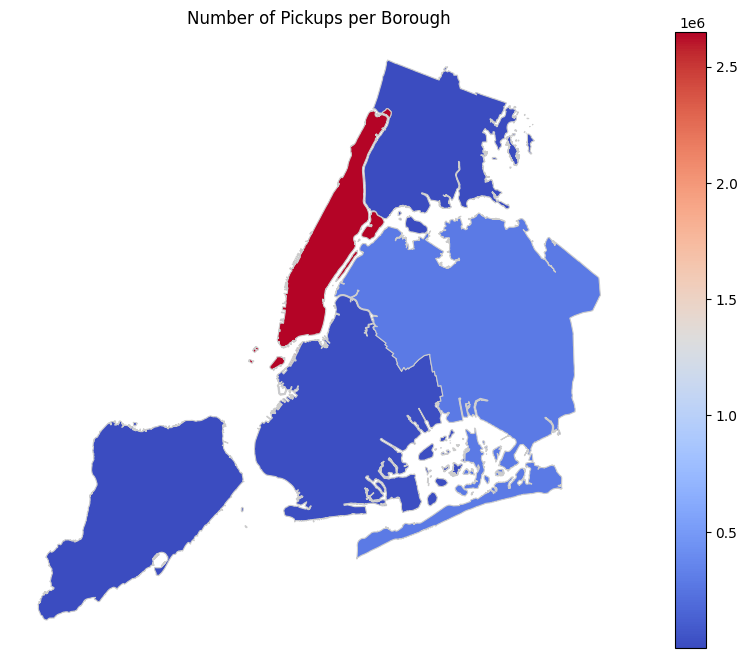

In [35]:
#Pick-Ups per Borough
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the number of pickups per borough
nyc_boroughs.plot(column='num_pickups', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title("Number of Pickups per Borough")
ax.axis('off')

plt.show()

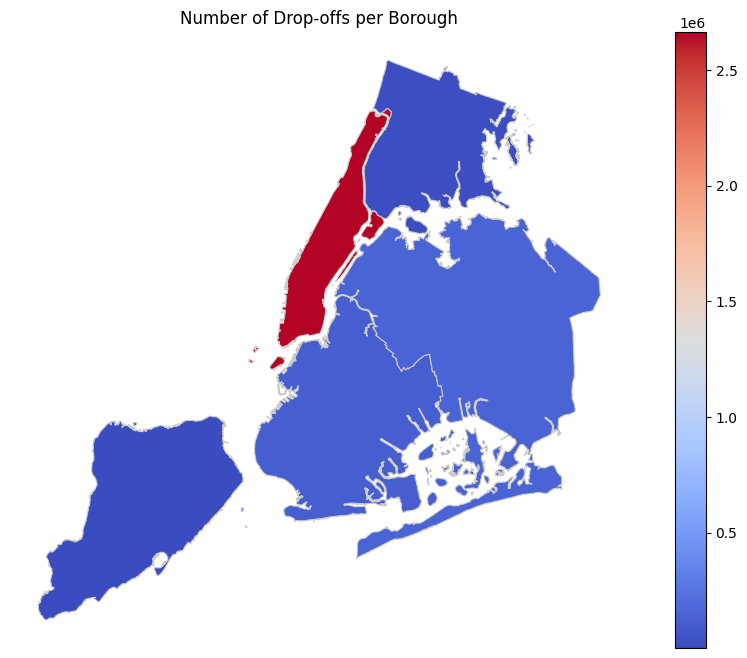

In [38]:
# Drop-Offs per Borough
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the number of drop-offs per borough
nyc_boroughs.plot(column='num_dropoffs', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title("Number of Drop-offs per Borough")
ax.axis('off')

plt.show()